In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df=pd.DataFrame(data=df)

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [20]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
df.shape # checking the rows and columns shape

(30, 17)

In [7]:
df.info()  # it will tell the kind of data present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.isnull().sum() # no null values are present 

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df.skew()    # checking the skewness 

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [22]:
# removing skewness from so column

so_log=np.log(df['SO'])
so_log.skew()

-0.5409553534890609

In [11]:
df.describe()  # understanding the data with describe function 

# the std is high in SO column ,data is widely spred,there is variations in SO column

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

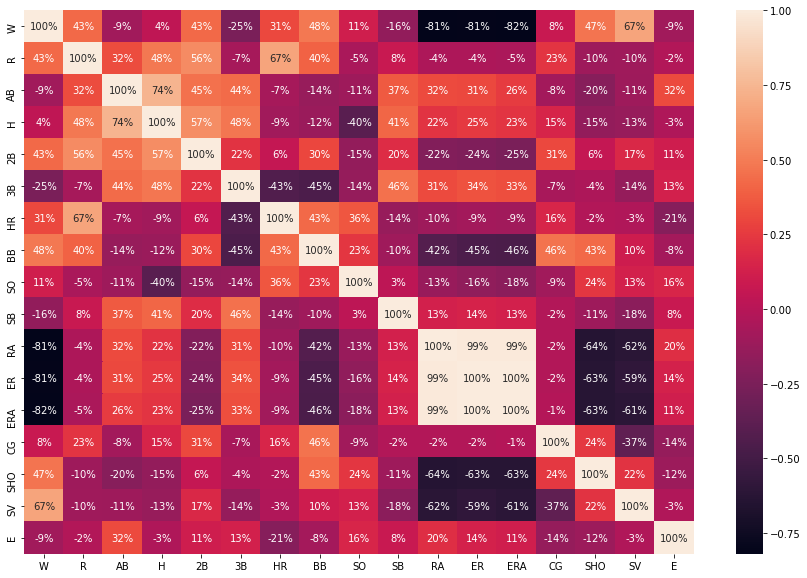

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [ ]:
# the corelation of wins with saves is reaaly good ,its also good with runs and SHO

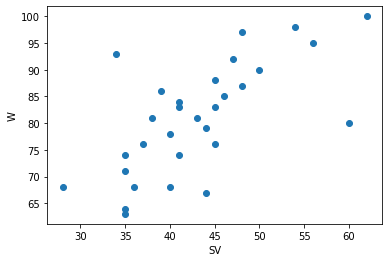

In [16]:
plt.scatter(x='SV',y='W',data=df)
plt.xlabel('SV')
plt.ylabel('W')
plt.show()

# it shows with more saves the wins are increasing 

<AxesSubplot:xlabel='W', ylabel='Count'>

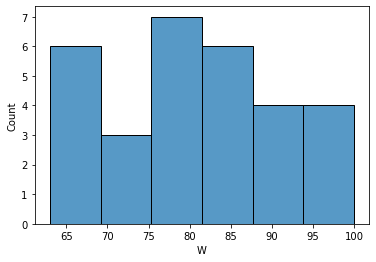

In [19]:
sns.histplot(x='W',data=df)            # wins and its counts 

<AxesSubplot:xlabel='R', ylabel='Count'>

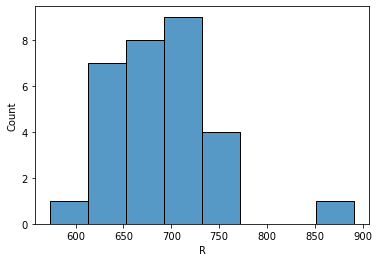

In [36]:
sns.histplot(x='R',data=df)                   # looking at thr runs and its counts 

<AxesSubplot:xlabel='HR', ylabel='Count'>

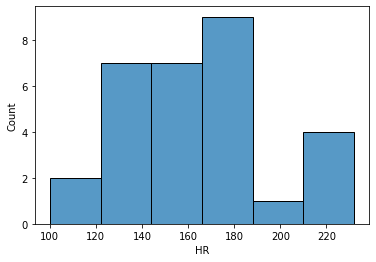

In [38]:
sns.histplot(x='HR',data=df)                 # home runs and its counts 

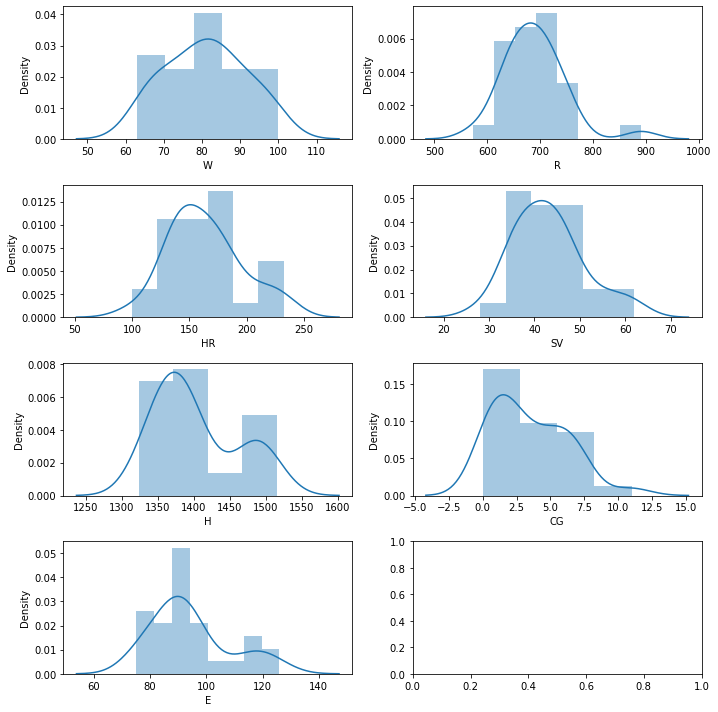

In [29]:
fig,ax=plt.subplots(4,2,figsize=(10,10))
sns.distplot(df['W'],ax=ax[0,0])
sns.distplot(df['R'],ax=ax[0,1])
sns.distplot(df['HR'],ax=ax[1,0])
sns.distplot(df['SV'],ax=ax[1,1])
sns.distplot(df['H'],ax=ax[2,0])
sns.distplot(df['CG'],ax=ax[2,1])
sns.distplot(df['E'],ax=ax[3,0])
plt.tight_layout()
plt.show()

In [26]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

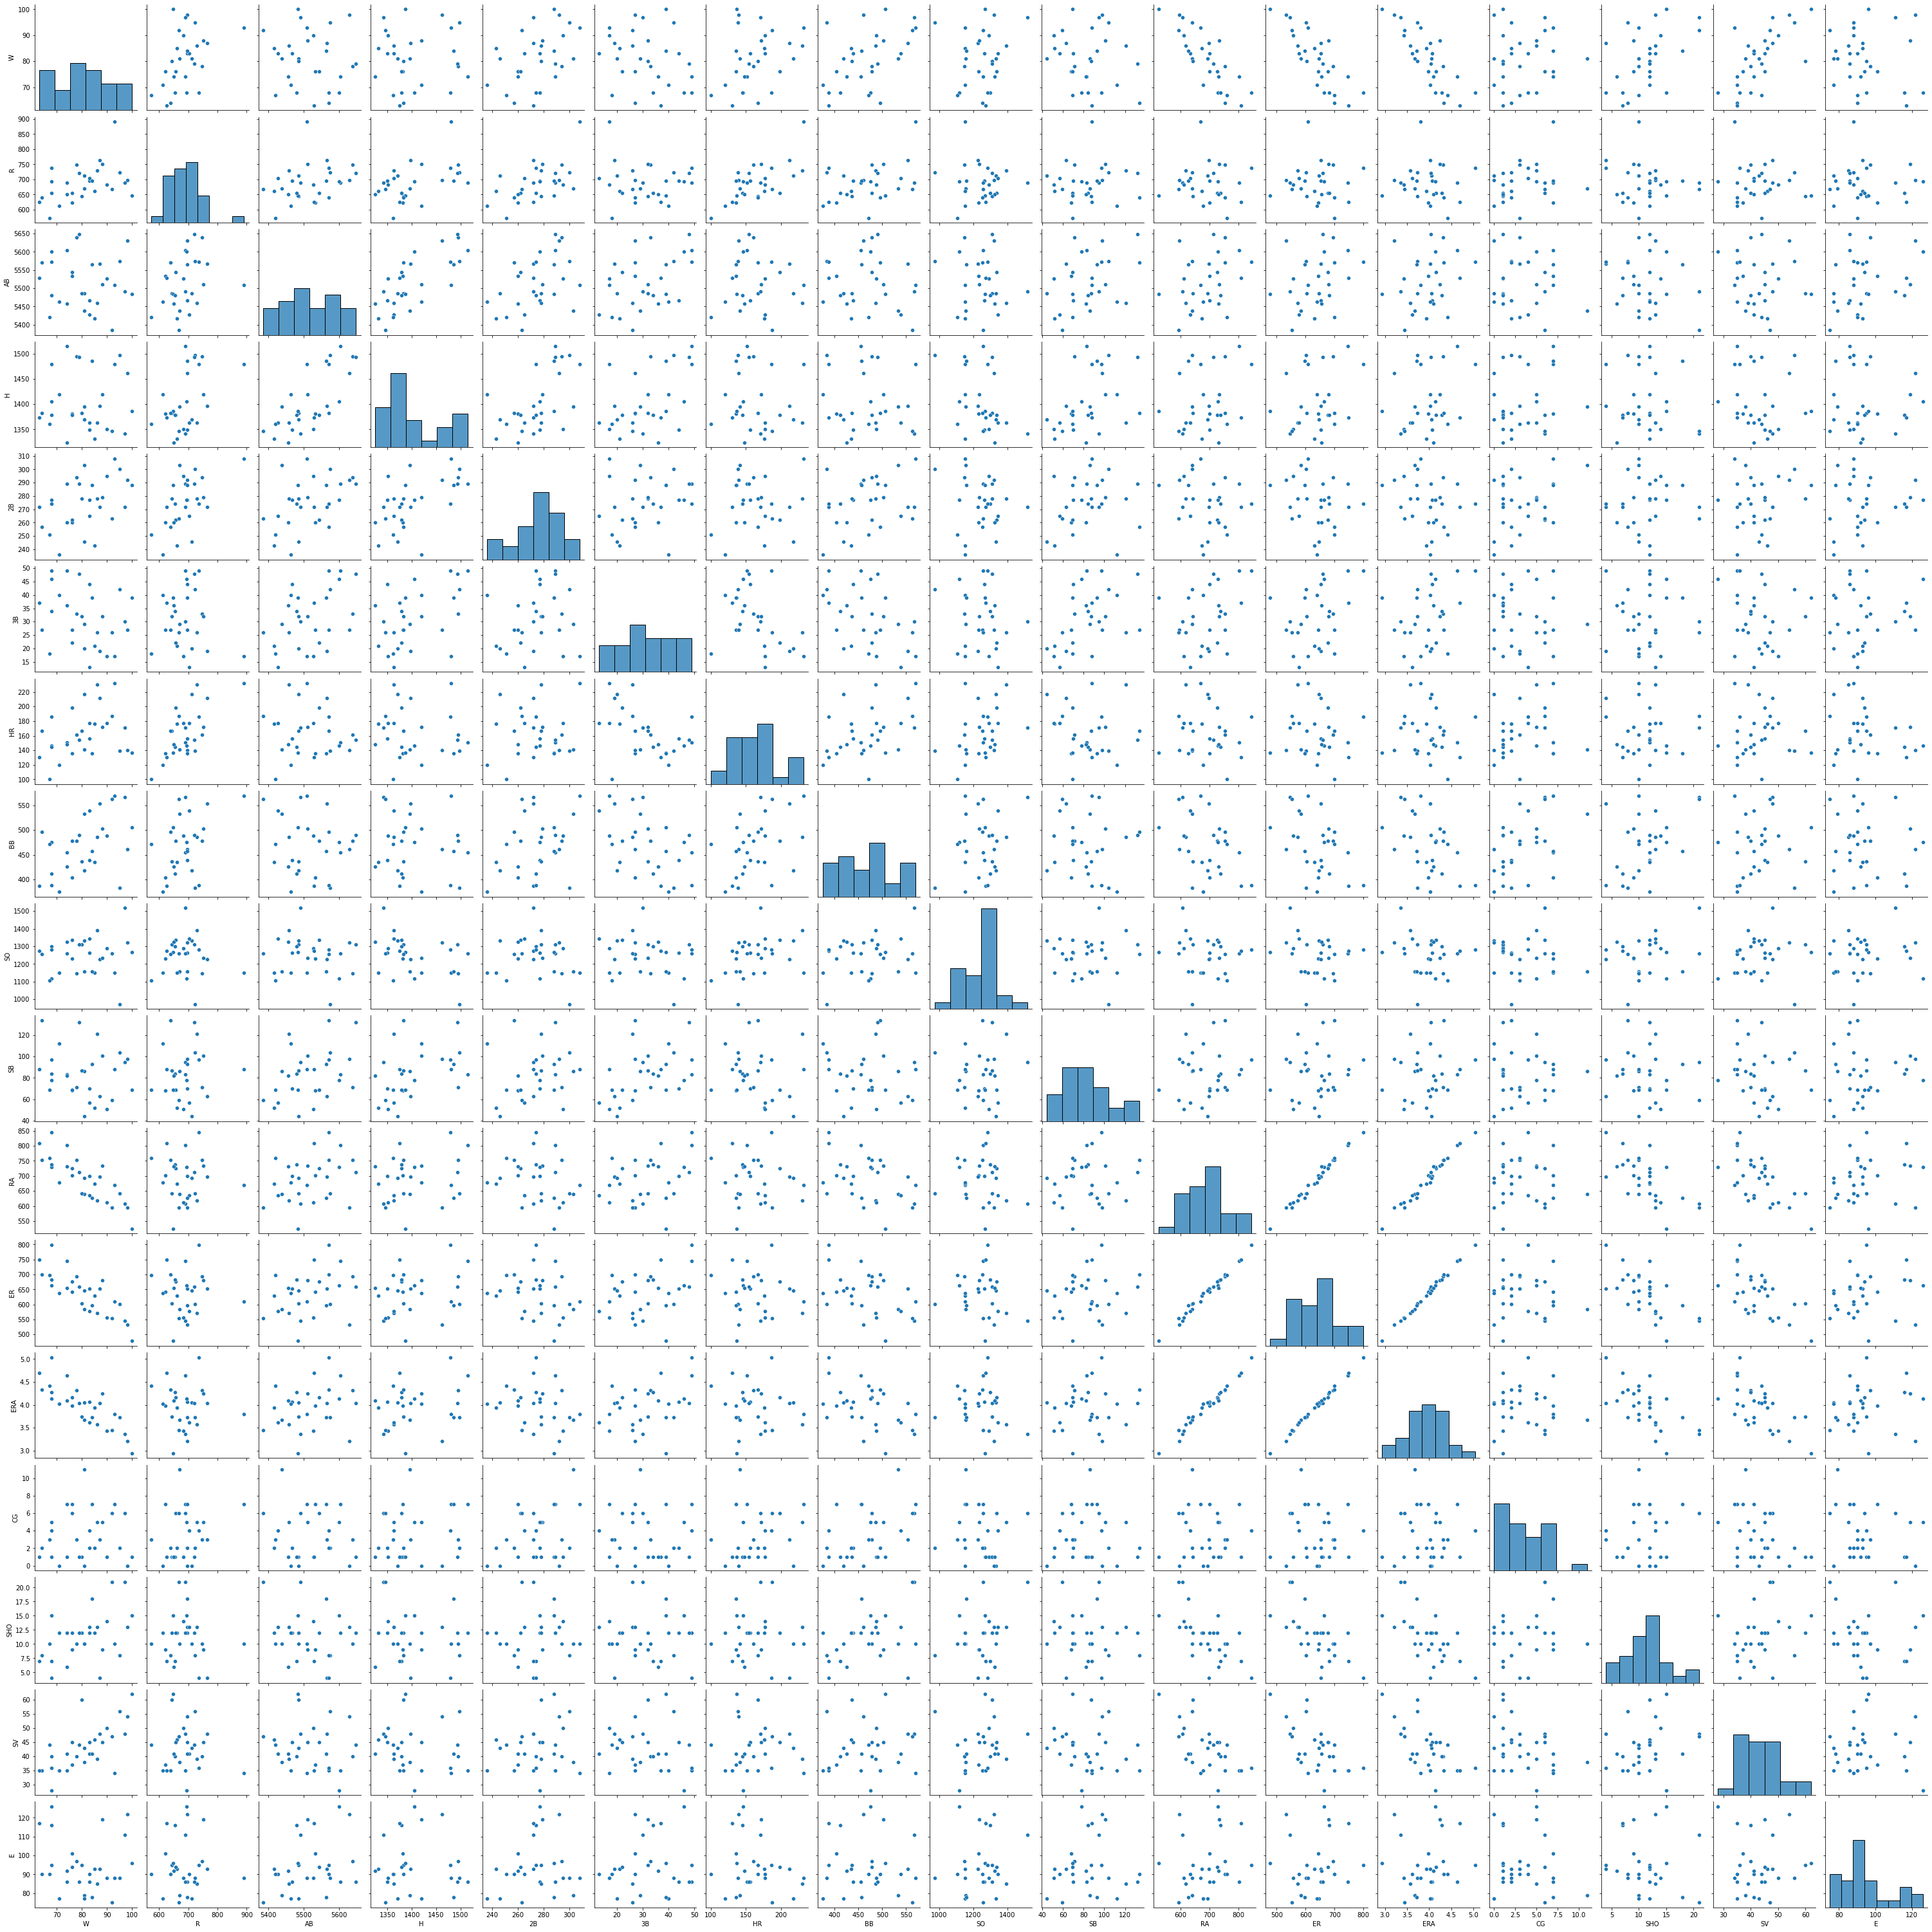

In [32]:
plt.figure(figsize=(25,25))
sns.pairplot(df)

In [39]:
# dividing data for training and testing 

In [40]:
x=df.iloc[:,1:]

In [42]:
y=df.iloc[:,0]

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [81]:
#APPLYING STANDARD SCALER 

sc_x=StandardScaler()

In [82]:
x_train=sc_x.fit_transform(x_train)

In [139]:
lr=LinearRegression()

In [140]:
lr.fit(x_train,y_train)

LinearRegression()

In [141]:
x_test=sc_x.fit_transform(x_test)

In [142]:
pred=lr.predict(x_test)
score=lr.score(x_test,y_test)*100

In [143]:
score

83.76835939364045

In [144]:
from sklearn.metrics import r2_score

print(r2_score(y_test,pred))

0.8376835939364045


In [145]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.9303625195294245
MSE: 21.85860934989753
RMSE: 4.675319170912028


In [146]:
# applying cross validation 
from sklearn.model_selection import cross_val_score

score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ 0.71136471 -2.21099237  0.38808753  0.73556937  0.5797478 ]
0.040755406674661356
1.1326079416324197


In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
rfc=RandomForestRegressor(n_estimators=300)

In [149]:
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
rscore=rfc.score(x_test,y_test)

In [150]:
rscore

0.7019880179684637

In [151]:
print(r2_score(y_test,rfc_pred))

0.7019880179684637


In [152]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,rfc_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rfc_pred)))

MAE: 5.142592592592591
MSE: 40.13228024691357
RMSE: 6.335004360449452


In [154]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ 0.16113419 -5.61296743  0.2043845   0.36585227  0.68079172]
-0.8401609510495591
2.393370583308076


In [153]:
rfc.feature_importances_

array([0.10453215, 0.03140864, 0.02429986, 0.05447373, 0.04007808,
       0.01168728, 0.05229478, 0.01279686, 0.02241541, 0.18713181,
       0.09316414, 0.07910033, 0.02524871, 0.00948094, 0.23363197,
       0.01825531])

In [155]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred=dtr.predict(x_test)
dscore=dtr.score(x_test,y_test)
dscore

0.44224422442244227

In [156]:

print('MAE:', metrics.mean_absolute_error(y_test, dpred))
print('MSE:', metrics.mean_squared_error(y_test, dpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dpred)))

MAE: 7.111111111111111
MSE: 75.11111111111111
RMSE: 8.666666666666666


In [157]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ -2.57282416 -10.39312977  -0.51485149   0.35949765   0.47810651]
-2.5286402516717432
4.081405625678148


In [127]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [128]:
kpred=knn.predict(x_test)

In [130]:
kscore=knn.score(x_test,y_test)
kscore

0.6230033003300333

In [137]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, kpred))
print('MSE:', metrics.mean_squared_error(y_test, kpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, kpred)))

MAE: 6.022222222222221
MSE: 50.76888888888885
RMSE: 7.125229041152912


In [133]:
print(r2_score(y_test,kpred))

0.6230033003300333


In [158]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.52888099 -3.77251908  0.16639756  0.08754788  0.51055621]
-0.7073796844198347
1.568802453004852


In [ ]:
# I HAVE APPLIED THE GRID SEARCH CV BUT ITS NOT GIVING THE GOOD RESULT 

In [112]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[100,200,300,400,500,600]}

grfc=GridSearchCV(rfc,param)
grfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600]})

In [113]:
grfc.best_estimator_

RandomForestRegressor()

In [96]:
grfc.best_score_

0.21344110624050217

In [159]:
# selecting the best model 

# Linear regression is the best model with the score of 83.76 as compare to other models 

In [160]:
# saving the best model


import  pickle as pk
file=open('baseball_prediction.pkl','wb')
pk.dump(lr,file)